In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred, add_prior_information
from pydynverse.methods import ti_paga
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds


from pydynverse import logger, settings

logger.setLevel("DEBUG")


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2025年01月07日 22时53分54秒] DEBUG    Dataset created: {'id': '20250107_225354__data_wrapper__t1OBWlhNxG',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method)
methods_selected = ti_paga(resolution=0.5)
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月07日 22时53分56秒] INFO     backend: python_function                                                    
                        INFO     Methods {'method': {'id': 'paga', 'name': 'PAGA', 'tool_id': 'paga', 'source':    
                                 'tool', 'platform': 'Python', 'url':                                              
                                 'https://github.com/theislab/graph_abstraction', 'authors': [{'given':            
                                 'Alexander', 'family': 'Wolf', 'email': 'alex.wolf@helmholtz-muenchen.de',        
                                 'github': 'falexwolf', 'ORCID': '0000-0002-8760-7838'}, {'given': 'Fabian',       
                                 'family': 'Theis', 'email': 'fabian.theis@helmholtz-muenchen.de', 'github':       
                                 'theislab'}]}, 'wrapper': {'type': 'branch_trajectory', 'topology_inference':     
                                 'free', 'trajectory_types': ['cycle', 'linear

In [4]:
# 3. 运行方法(wrap)
dataset = add_prior_information(dataset, start_id="1_iN1_C01", groups_id=list(fibroblast_reprogramming_treutlein["grouping"])) # 添加先验知识

model = infer_trajectory(dataset, methods_selected,
                         parameters={"connectivity_cutoff":0.8}) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpldwhh0fz                                                         
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {'start_id': '1_iN1_C01', 'groups_id': ['d2_induced', 'd2_induced',       
                                 'd2_induced', 'd2_intermediate', 'd2_intermediate', 'd2_induced',                 
                                 'd2_intermediate', 'd2_induced', 'd2_induced', 'd2_intermediate', 'd2_induced',   
                                 'd2_induced', 'd2_induced', 'd2_induced', 'd2_intermediate', 'd2_induced',        
                                 'd2_intermediate', 'd2_induced', 'd2_intermediate', 'd2_induced', 'd2_induced',   
                                 'MEF', 'd2_induced', 'MEF', 'MEF', 'd2_intermediate', 'd2_induced', 'd2_induced', 
                                 'd2_induced', 'd2_intermediate', 'd2_in

/home/huang/.conda/envs/pydynverse/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


[2025年01月07日 22时54分00秒] INFO     Methods executing finished, model: {'id':                                   
                                       '20250107_225400__data_wrapper__5NsjByxkJn', 'cell_ids': ['1_iN1_C01',      
                                       '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05', '1_iN1_C07',            
                                       '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', '1_iN1_C11', '1_iN1_C12',            
                                       '1_iN1_C13', '1_iN1_C14', '1_iN1_C15', '1_iN1_C16', '1_iN1_C17',            
                                       '1_iN1_C19', '1_iN1_C20', '1_iN1_C21', '1_iN1_C22', '1_iN1_C23',            
                                       '1_iN1_C25', '1_iN1_C26', '1_iN1_C27', '1_iN1_C29', '1_iN1_C30',            
                                       '1_iN1_C31', '1_iN1_C33', '1_iN1_C34', '1_iN1_C35', '1_iN1_C36',            
                                       '1_iN1_C37', '1_iN1_C38', '1_iN1_C40', 

/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/methods/function/ti_paga_function.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  branches["length"] = adata.obs[[cluster_key, "dpt_pseudotime"]].groupby(cluster_key).apply(lambda x: x["dpt_pseudotime"].max() - x["dpt_pseudotime"].min()+epsilon).reset_index()[0]


[2025年01月07日 22时54分02秒] INFO     Coloring by grouping                                                        
                        DEBUG    selecting waypoints                                                               
[2025年01月07日 22时54分03秒] DEBUG    selecting waypoints shape is (130, 392), finished!                          
                        INFO     Result plotting finished                                                          


/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/wrap/wrap_add_waypoints.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.assign(
/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/plot/project_waypoints.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segments = segments.groupby("group").apply(calculate_closest_and_arrow).reset_index(drop=True)
/home/huang

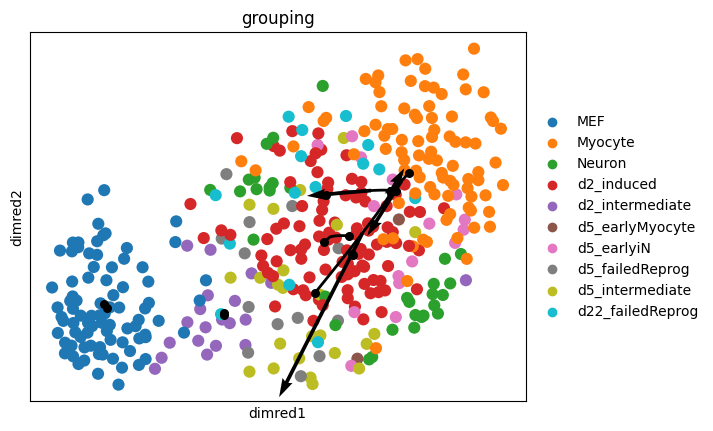

In [5]:
# 4. 绘制轨迹(dimred+plot)
model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))
logger.info("Result plotting finished")